In [1]:
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
import pandas as pd

df = pd.read_csv('full_data.csv', encoding = 'CP949')

In [3]:
df.iloc[1,3:]

2011.01 월       4223301.0
2011.02 월       4225512.0
2011.03 월       4221613.0
2011.04 월       4219198.0
2011.05 월       4214866.0
                  ...    
2024.01 월       4471017.0
2024.02 월       4480607.0
2024.03 월       4485819.0
2024.04 월       4486137.0
Unnamed: 163          NaN
Name: 1, Length: 161, dtype: object

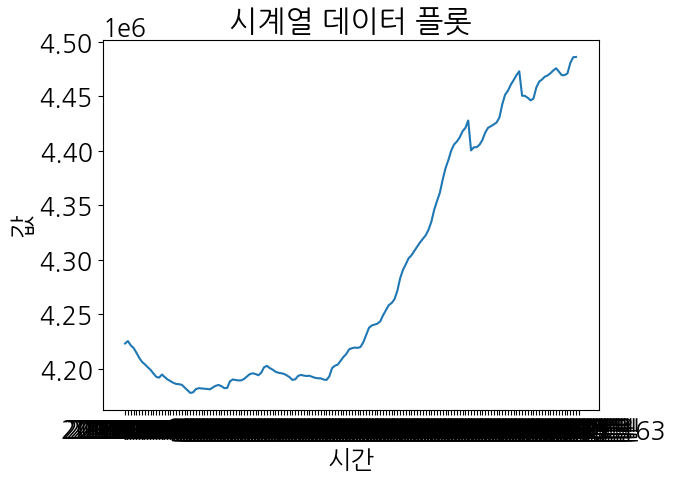

In [4]:
import matplotlib.pyplot as plt

# 시계열 데이터의 인덱스를 x축으로 사용하여 플로팅
plt.plot(df.iloc[1, 3:])
plt.xlabel('시간')
plt.ylabel('값')
plt.title('시계열 데이터 플롯')
plt.show()


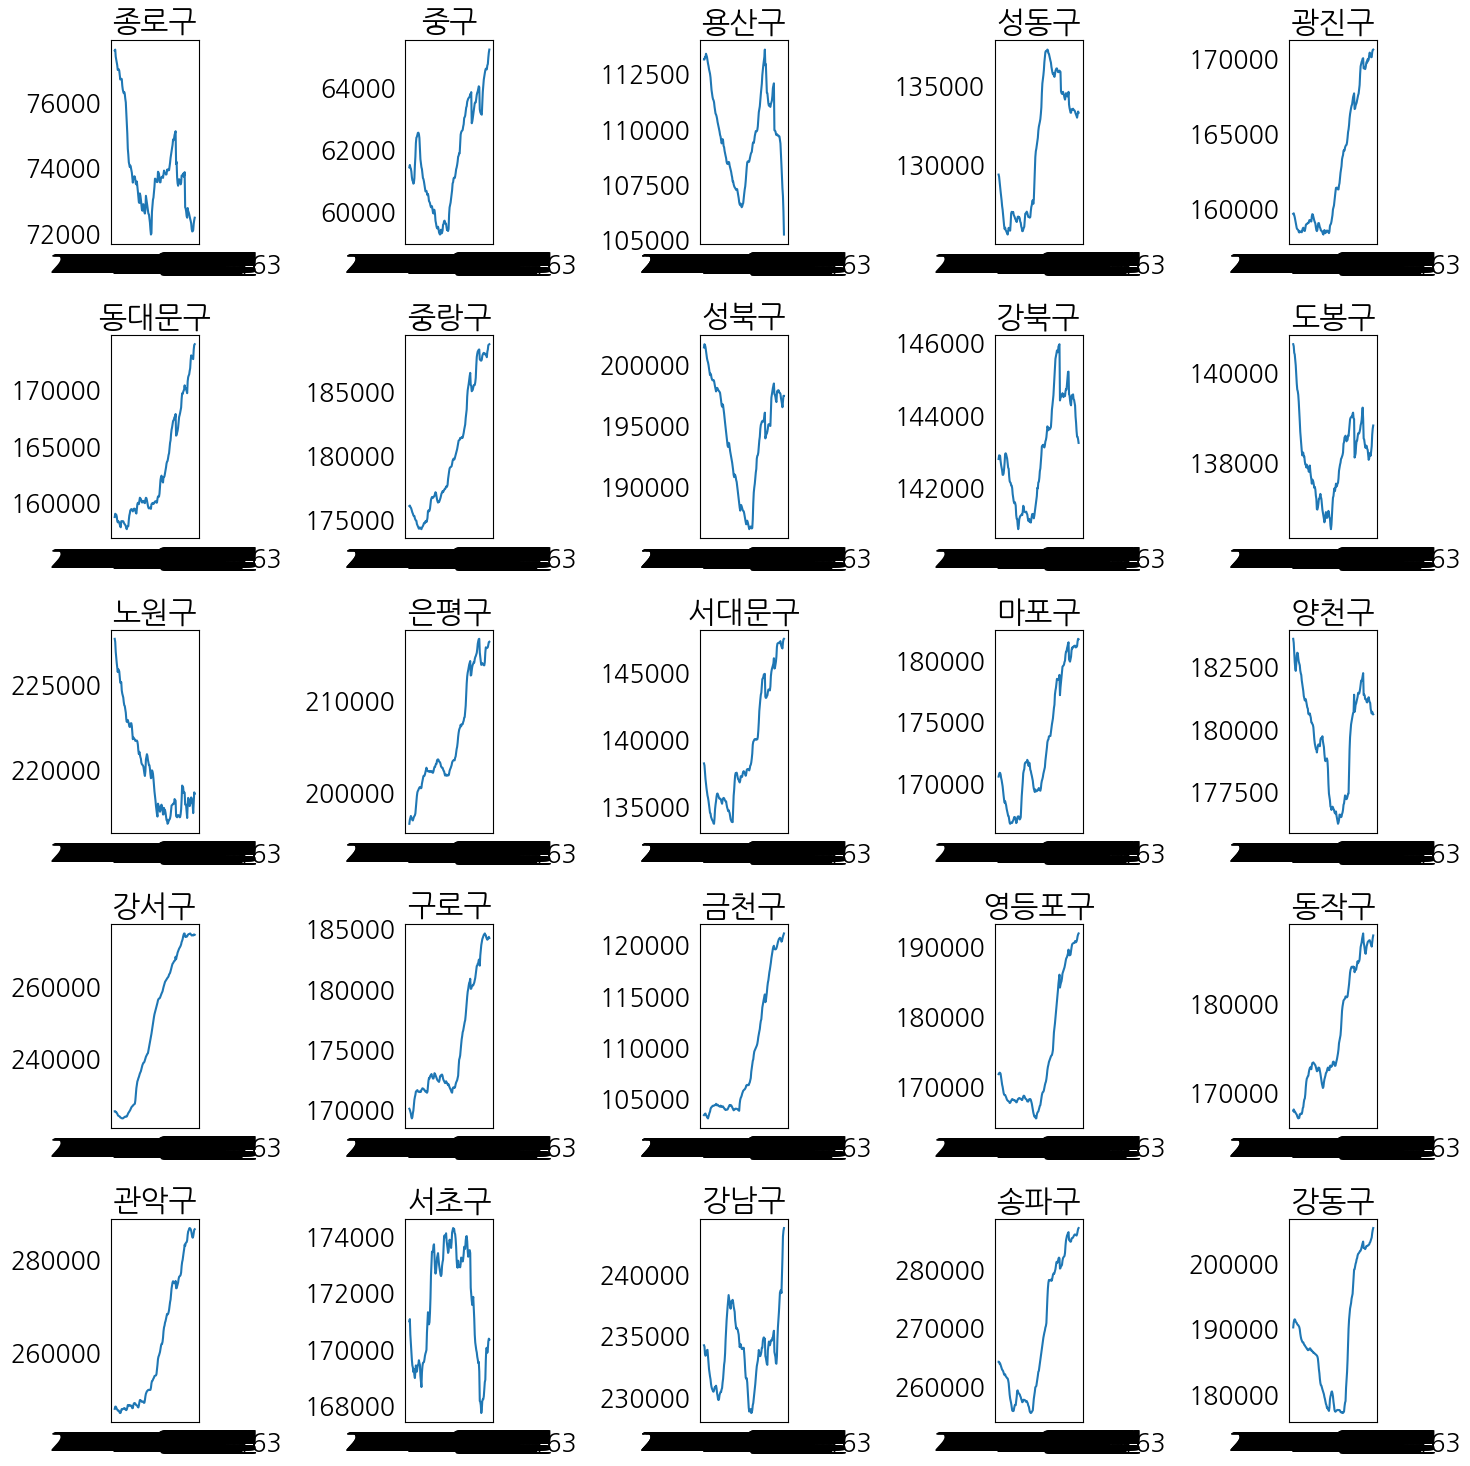

In [5]:
import matplotlib.pyplot as plt

# subplot의 행과 열 개수 설정
num_rows = 5
num_cols = 5

# subplot 생성
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# 각 subplot에 데이터 플로팅
for i in range(2, 27):
    row = (i - 2) // num_cols
    col = (i - 2) % num_cols
    axs[row, col].plot(df.iloc[i, 3:])
    axs[row, col].set_title(df.iloc[i, 0])  # 제목을 df.iloc[i, 0]로 설정
    axs[row, col].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)  # 축 라벨 제거

# 레이아웃 조정
plt.tight_layout()
plt.show()


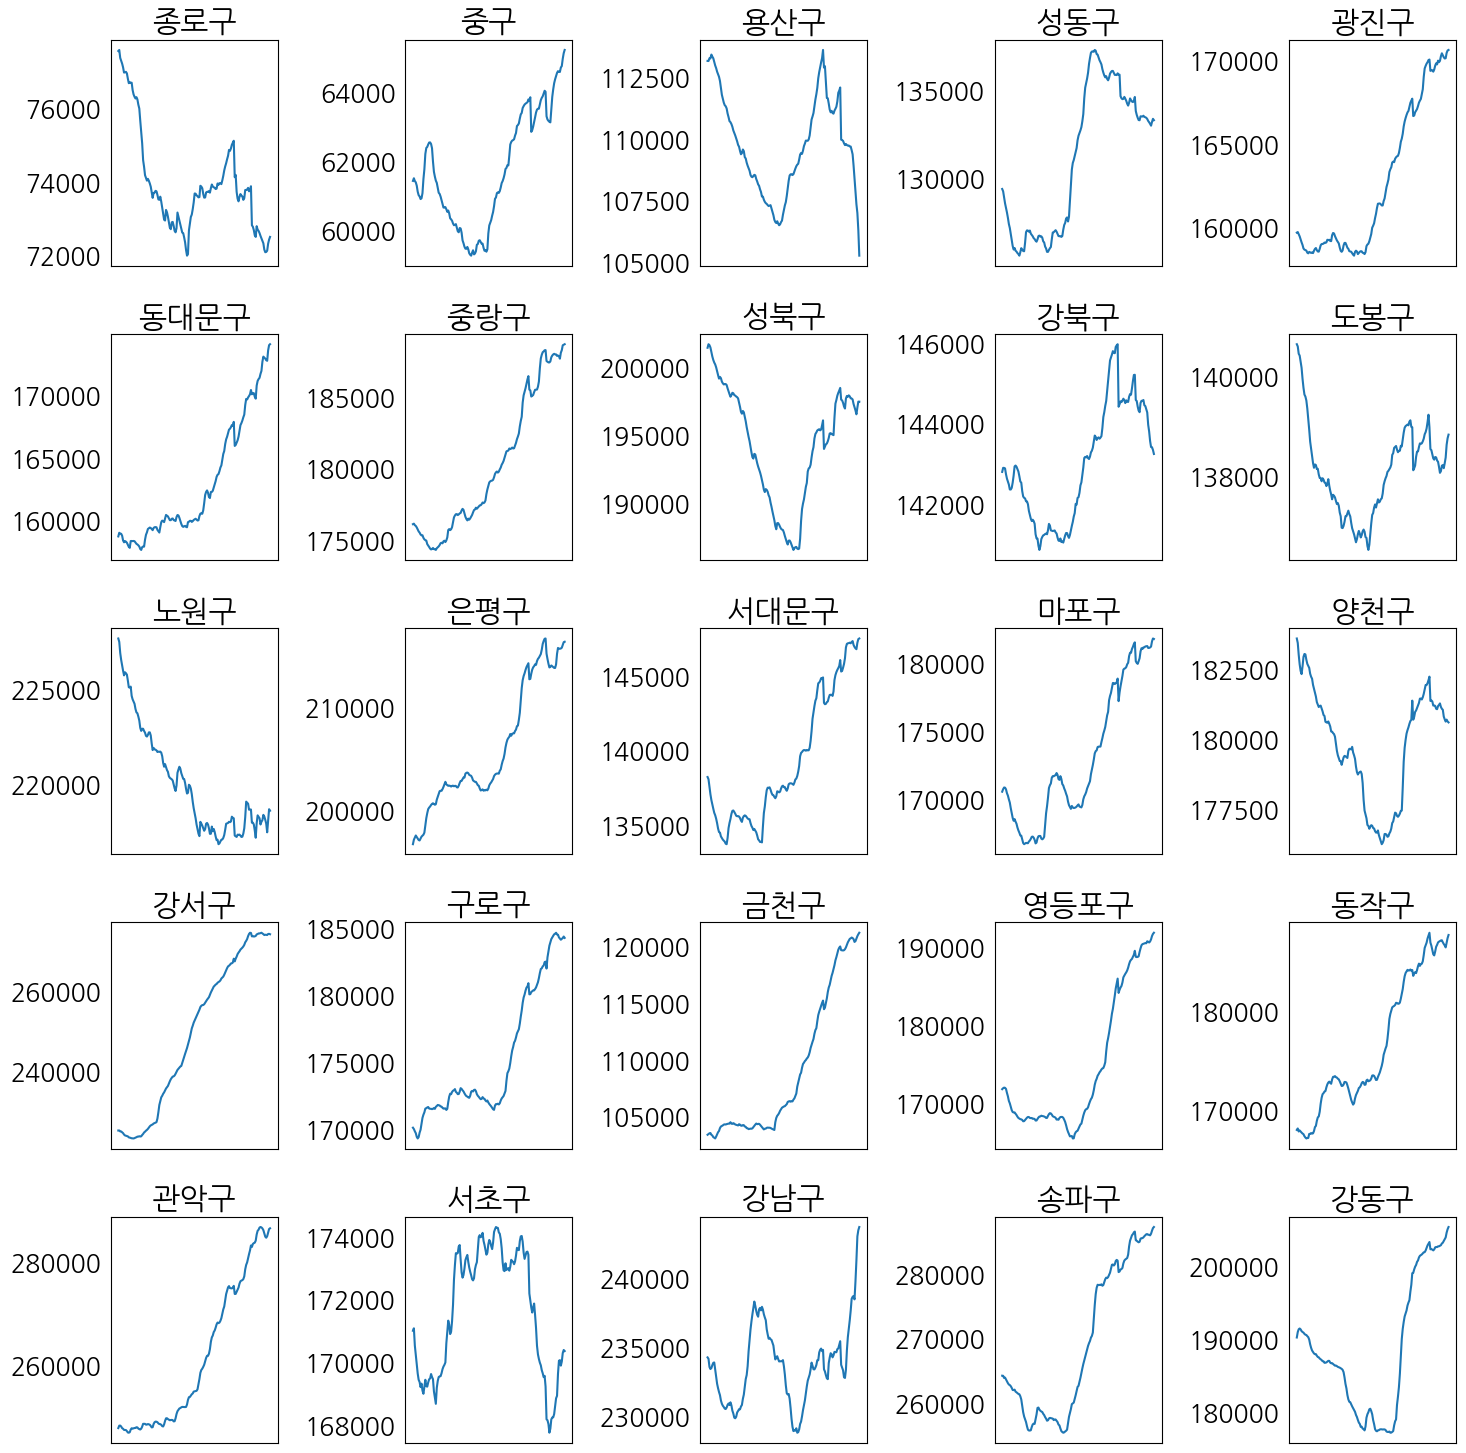

In [6]:
import matplotlib.pyplot as plt

# subplot의 행과 열 개수 설정
num_rows = 5
num_cols = 5

# subplot 생성
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# 데이터프레임에서 플로팅할 데이터 추출
data_to_plot = df.iloc[2:27, 3:]

# 각 subplot에 데이터 플로팅
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j  # 각 subplot에 플로팅할 데이터의 인덱스 계산
        if index < 25:
            axs[i, j].plot(data_to_plot.iloc[index])
            axs[i, j].set_title(df.iloc[index+2, 0])  # 제목을 df.iloc[i+2, 0]로 설정 (첫 번째 행부터 시작이니까)
            axs[i, j].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # x 라벨 제거
            axs[i, j].tick_params(axis='y', which='both', left=False, right=False)  # y 라벨 제거
        else:
            axs[i, j].axis('off')  # 25개보다 적은 데이터는 축을 없앱니다.

# 레이아웃 조정
plt.tight_layout()
plt.show()


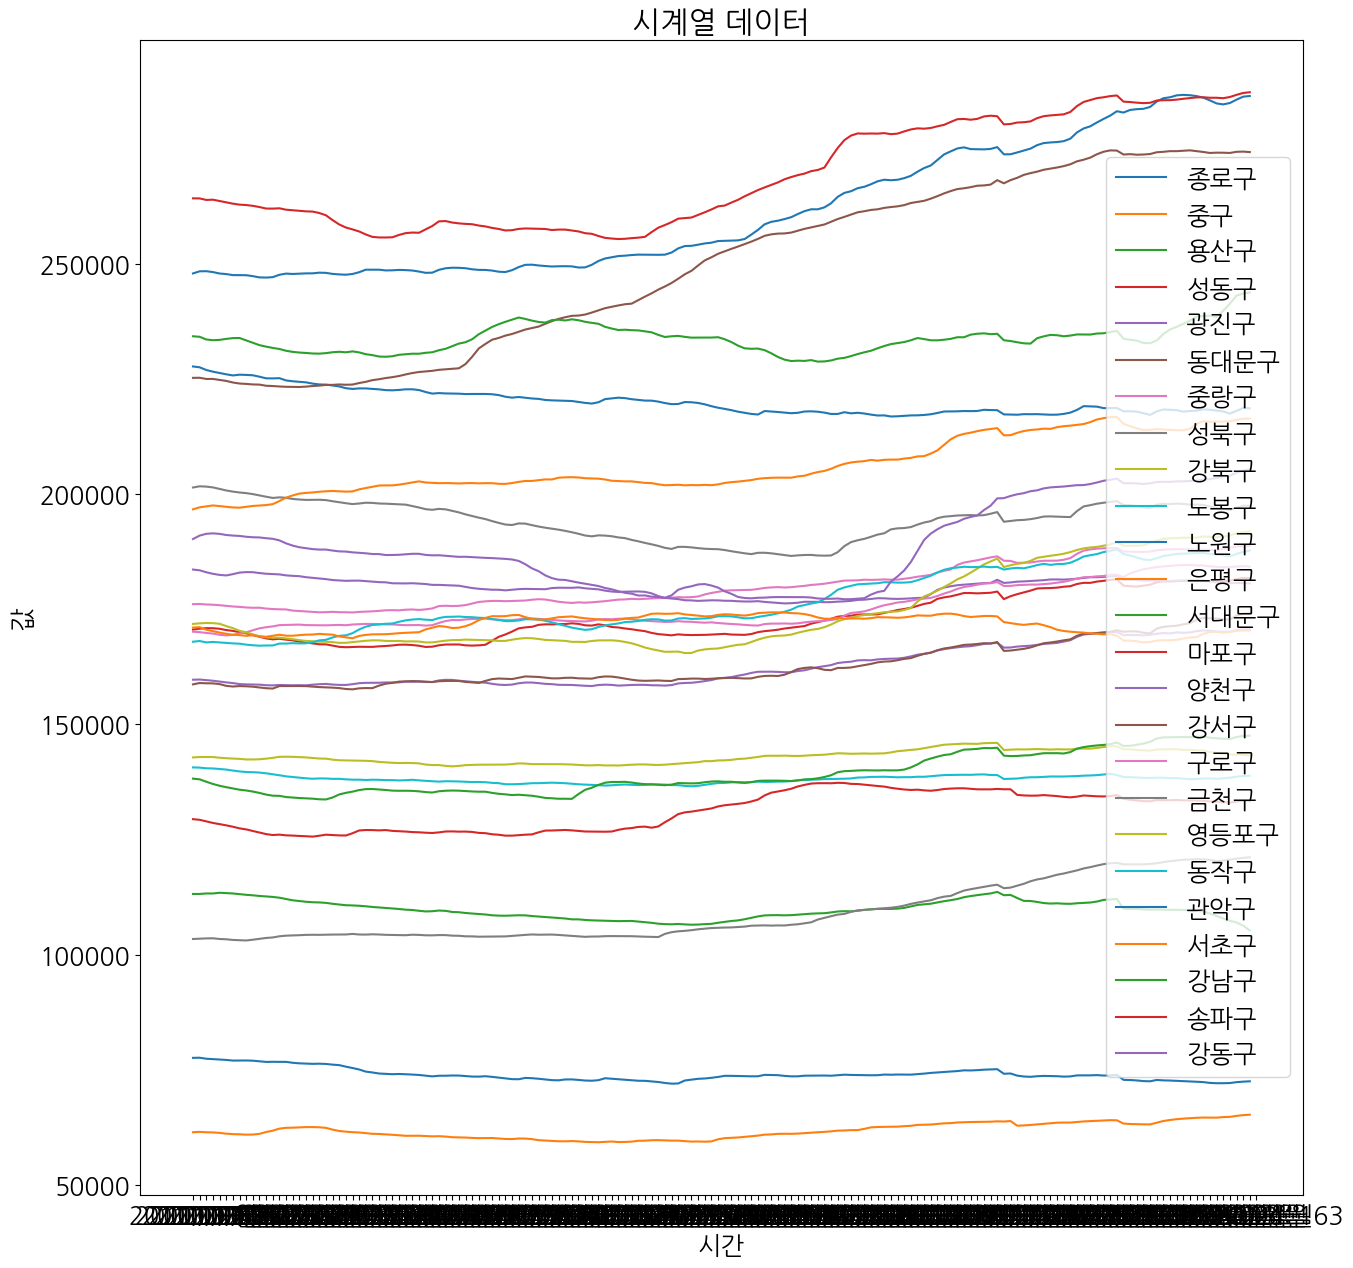

In [7]:
import matplotlib.pyplot as plt

# 데이터프레임의 모든 행과 열에 대한 데이터를 모두 가져옵니다.
# 이를 하나의 subplot에 그려 전체 데이터를 표시합니다.
plt.figure(figsize=(15, 15))
for i in range(2, 27):
    plt.plot(df.iloc[i, 3:], label=df.iloc[i, 0])  # 각 plot의 label로 df.iloc[i, 0]을 사용합니다.

plt.xlabel('시간')
plt.ylabel('값')
plt.title('시계열 데이터')
plt.legend()  # 각 plot의 label을 범례로 표시합니다.
plt.show()


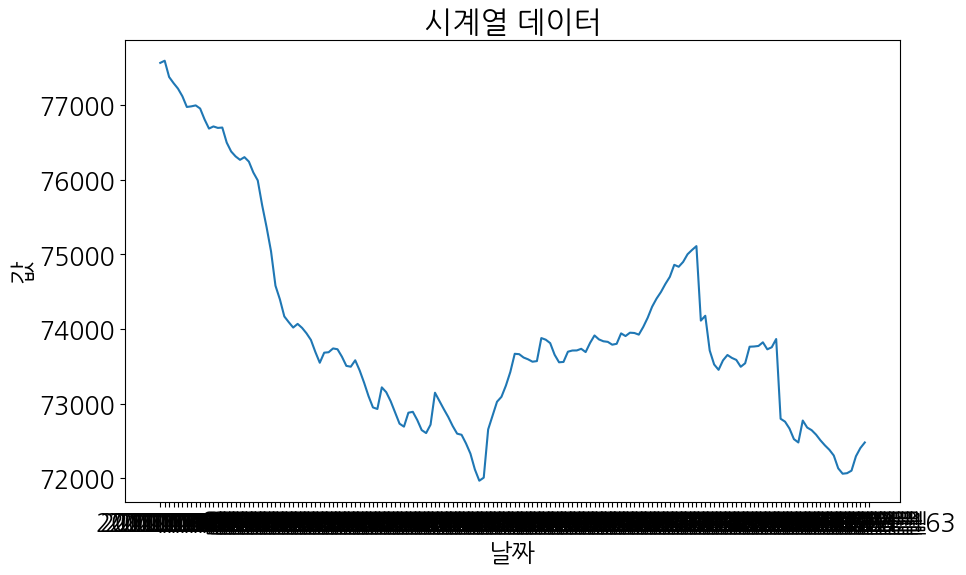

ADF 테스트 결과:
ADF 통계량: nan
p-value: nan
Critical Values:
   1%: -3.4718957209472654
   5%: -2.8797795410156253
   10%: -2.5764947265625
p-value가 0.05 이상이므로 시계열 데이터는 비정상 시계열로 간주됩니다.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# 시계열 데이터 생성 (임의로 생성)
data = df.iloc[2,3:]

# ADF 테스트 함수 정의
def adf_test(timeseries):
    # ADF 테스트 수행
    result = adfuller(timeseries, autolag='AIC')
    
    # 결과 출력
    print('ADF 테스트 결과:')
    print(f'ADF 통계량: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    
    # 결과 해석
    if result[1] <= 0.05:
        print("p-value가 0.05 이하이므로 시계열 데이터는 정상 시계열로 간주됩니다.")
    else:
        print("p-value가 0.05 이상이므로 시계열 데이터는 비정상 시계열로 간주됩니다.")

# 시계열 그래프 출력
def plot_timeseries(data):
    plt.figure(figsize=(10,6))
    plt.plot(data)
    plt.title('시계열 데이터')
    plt.xlabel('날짜')
    plt.ylabel('값')
    plt.show()

# 시계열 그래프 출력
plot_timeseries(data)

# ADF 테스트 수행
adf_test(data)


In [9]:
import pandas as pd

# 주어진 데이터프레임 df
# df = ...

# data 선택 (2번째 행의 4번째 열부터 끝까지)
data = df.iloc[2, 3:]

# 벡터 차분
diff_data = data.diff().dropna()

# 결과 출력
print(diff_data)


2011.02 월     29.0
2011.03 월   -218.0
2011.04 월    -82.0
2011.05 월    -74.0
2011.06 월   -103.0
             ...  
2023.12 월      7.0
2024.01 월     34.0
2024.02 월    193.0
2024.03 월    110.0
2024.04 월     75.0
Name: 2, Length: 159, dtype: object


In [10]:
adf_test(diff_data)

ADF 테스트 결과:
ADF 통계량: -6.689991160432045
p-value: 4.132848813672826e-09
Critical Values:
   1%: -3.472703119504854
   5%: -2.880131672353732
   10%: -2.5766826861130268
p-value가 0.05 이하이므로 시계열 데이터는 정상 시계열로 간주됩니다.


In [11]:
data_seoul = df.iloc[1, 3:]
data_gu = df.iloc[2:27, 3:]

In [12]:
data_seoul.dropna()

2011.01 월    4223301.0
2011.02 월    4225512.0
2011.03 월    4221613.0
2011.04 월    4219198.0
2011.05 월    4214866.0
               ...    
2023.12 월    4469417.0
2024.01 월    4471017.0
2024.02 월    4480607.0
2024.03 월    4485819.0
2024.04 월    4486137.0
Name: 1, Length: 160, dtype: object

In [13]:
diff_seoul = data_seoul.diff().dropna()
diff_seoul


2011.02 월    2211.0
2011.03 월   -3899.0
2011.04 월   -2415.0
2011.05 월   -4332.0
2011.06 월   -4762.0
              ...  
2023.12 월      43.0
2024.01 월    1600.0
2024.02 월    9590.0
2024.03 월    5212.0
2024.04 월     318.0
Name: 1, Length: 159, dtype: object

# LSTM

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt



In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

def LSTM_people(df, window_size):
    df.dropna(inplace=True)
    new_dataset = pd.DataFrame(list(df.items()), columns=['Date', 'diff_people'])
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    new_dataset.index = new_dataset.Date
    new_dataset.drop("Date", axis=1, inplace=True)
    final_dataset = new_dataset.values
    
    train_data = final_dataset[0:118, :]
    valid_data = final_dataset[118:, :]
    
    scaled_data = scaler.fit_transform(final_dataset)
    
    x_train_data, y_train_data = [], []
    
    for i in range(window_size, len(train_data)):
        x_train_data.append(scaled_data[i-window_size:i, 0])
        y_train_data.append(scaled_data[i, 0])
        
    x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
    x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))
    
    lstm_model = Sequential()
    lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
    lstm_model.add(LSTM(units=50))
    lstm_model.add(Dense(1))
    
    inputs_data = new_dataset[len(new_dataset) - len(valid_data) - window_size:].values
    inputs_data = inputs_data.reshape(-1, 1)
    inputs_data = scaler.transform(inputs_data)
    
    lstm_model.compile(loss='mean_squared_error', optimizer='adam')
    lstm_model.fit(x_train_data, y_train_data, epochs=3, batch_size=1, verbose=2)
    
    # validation
    X_test = []
    for i in range(window_size, inputs_data.shape[0]):
        X_test.append(inputs_data[i-window_size:i, 0])
    X_test = np.array(X_test)
    
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_closing_price = lstm_model.predict(X_test)
    predicted_closing_price = scaler.inverse_transform(predicted_closing_price)
    
    train_data = new_dataset[:118]
    valid_data = new_dataset[118:]
    valid_data['Predictions'] = predicted_closing_price
    
    # Drop NaN values if any
    valid_data = valid_data.dropna()
    
    # Calculate MAE and RMSE
    mae = mean_absolute_error(valid_data['diff_people'], valid_data['Predictions'])
    rmse = np.sqrt(mean_squared_error(valid_data['diff_people'], valid_data['Predictions']))
    
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    
    # plt.plot(train_data["diff_people"], label='Train')
    # plt.plot(valid_data[['diff_people']], label='Actual')
    # plt.plot(valid_data[['Predictions']], label='Predicted')
    # plt.legend()
    # plt.show()
    
    return pd.DataFrame({'MAE': [mae], 'RMSE': [rmse]})

# Example usage (assuming data_gu is defined and has the required structure):
# LSTM_people(data_gu.iloc[0, :], 6)


Epoch 1/3


c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 21ms/step - loss: 0.0134
Epoch 2/3
112/112 - 0s - 3ms/step - loss: 0.0055
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0046
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
MAE: 354.60770089285717
RMSE: 422.72476789160226


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\3040457982.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price


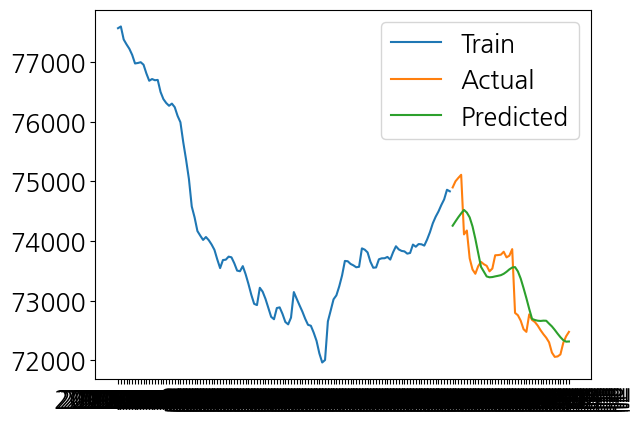

In [47]:
error = LSTM_people(data_gu.iloc[0,:], 6)

In [83]:
import pandas as pd

# 각 행에 대해 AR_people 함수를 호출하고 결과를 저장할 리스트
results = []

# 0번 행부터 25번 행까지 반복
for i in range(25):
    print(i)
    result_df = LSTM_people(data_gu.iloc[i, :], 6)
    result_df['Row'] = i  # 결과에 행 번호를 추가
    results.append(result_df)

# 모든 결과를 하나의 데이터프레임으로 묶기
final_results = pd.concat(results).reset_index(drop=True)
print(final_results)


0
Epoch 1/3


c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 19ms/step - loss: 0.0177
Epoch 2/3
112/112 - 0s - 3ms/step - loss: 0.0047
Epoch 3/3
112/112 - 0s - 3ms/step - loss: 0.0050
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
MAE: 374.40401785714283
RMSE: 445.0329794430099
1
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 20ms/step - loss: 0.0155
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0058
Epoch 3/3
112/112 - 0s - 3ms/step - loss: 0.0050
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
MAE: 485.0328311011905
RMSE: 609.0733322879184
2
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 20ms/step - loss: 0.0308
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0044
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0052
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
MAE: 805.3790922619048
RMSE: 1010.9597325351987
3
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 20ms/step - loss: 0.0256
Epoch 2/3
112/112 - 0s - 3ms/step - loss: 0.0074
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0066
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step  
MAE: 332.84486607142856
RMSE: 381.3341514408407
4
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 20ms/step - loss: 0.0092
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0015
Epoch 3/3
112/112 - 0s - 4ms/step - loss: 0.0017
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
MAE: 1173.1815476190477
RMSE: 1321.2345657964306
5
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 19ms/step - loss: 0.0062
Epoch 2/3
112/112 - 0s - 3ms/step - loss: 0.0012
Epoch 3/3
112/112 - 0s - 3ms/step - loss: 0.0011
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
MAE: 5499.838913690476
RMSE: 5831.61752336914
6
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 20ms/step - loss: 0.0129
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0015
Epoch 3/3
112/112 - 0s - 3ms/step - loss: 0.0016
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
MAE: 2261.012276785714
RMSE: 2502.2987713469024
7
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 20ms/step - loss: 0.0295
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0047
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0046
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
MAE: 1113.6417410714287
RMSE: 1369.2287643387042
8
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 18ms/step - loss: 0.0312
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0047
Epoch 3/3
112/112 - 0s - 3ms/step - loss: 0.0062
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
MAE: 817.3482142857143
RMSE: 942.412448011999
9
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 19ms/step - loss: 0.0209
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0060
Epoch 3/3
112/112 - 0s - 3ms/step - loss: 0.0050
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
MAE: 250.93377976190476
RMSE: 318.36145810741215
10
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 19ms/step - loss: 0.0126
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0018
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0021
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
MAE: 543.265625
RMSE: 668.6986211557788
11
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 19ms/step - loss: 0.0116
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0019
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0018
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
MAE: 5712.872023809524
RMSE: 5891.105676069936
12
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 19ms/step - loss: 0.0199
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0041
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0041
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
MAE: 1891.0598958333333
RMSE: 2126.299014327878
13
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 20ms/step - loss: 0.0081
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0036
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0034
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
MAE: 3381.8214285714284
RMSE: 3511.912916342477
14
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 20ms/step - loss: 0.0258
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0076
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0066
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
MAE: 436.93638392857144
RMSE: 514.7292797347438
15
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 19ms/step - loss: 0.0223
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 9.2198e-04
Epoch 3/3
112/112 - 0s - 3ms/step - loss: 7.6920e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  
MAE: 1446.9657738095239
RMSE: 1614.920925512027
16
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 18ms/step - loss: 0.0131
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0014
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0013
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
MAE: 3401.657738095238
RMSE: 3692.6173942108912
17
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 21ms/step - loss: 0.0067
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 6.5290e-04
Epoch 3/3
112/112 - 0s - 3ms/step - loss: 5.9398e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
MAE: 2167.229910714286
RMSE: 2427.354737828859
18
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 21ms/step - loss: 0.0060
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0016
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0016
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
MAE: 11213.92931547619
RMSE: 11761.75701565196
19
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 21ms/step - loss: 0.0153
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0021
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0027
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
MAE: 674.3921130952381
RMSE: 892.26965221624
20
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 20ms/step - loss: 0.0071
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 5.5165e-04
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 6.5906e-04
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
MAE: 1429.575892857143
RMSE: 1803.0032297358405
21
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 19ms/step - loss: 0.0446
Epoch 2/3
112/112 - 0s - 3ms/step - loss: 0.0097
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0116
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
MAE: 671.1886160714286
RMSE: 810.0479095696893
22
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 20ms/step - loss: 0.0144
Epoch 2/3
112/112 - 0s - 3ms/step - loss: 0.0070
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0066
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
MAE: 1982.751488095238
RMSE: 2531.600864284649
23
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 19ms/step - loss: 0.0190
Epoch 2/3
112/112 - 0s - 3ms/step - loss: 0.0036
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0039
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
MAE: 4769.4985119047615
RMSE: 4911.226305605332
24
Epoch 1/3


C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price
c:\Users\yeppi\miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 - 2s - 18ms/step - loss: 0.0117
Epoch 2/3
112/112 - 0s - 2ms/step - loss: 0.0062
Epoch 3/3
112/112 - 0s - 2ms/step - loss: 0.0056
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
MAE: 2199.6618303571427
RMSE: 2376.3507473290892
             MAE          RMSE  Row
0     374.404018    445.032979    0
1     485.032831    609.073332    1
2     805.379092   1010.959733    2
3     332.844866    381.334151    3
4    1173.181548   1321.234566    4
5    5499.838914   5831.617523    5
6    2261.012277   2502.298771    6
7    1113.641741   1369.228764    7
8     817.348214    942.412448    8
9     250.933780    318.361458    9
10    543.265625    668.698621   10
11   5712.872024   5891.105676   11
12   1891.059896   2126.299014   12
13   3381.821429   3511.912916   13
14    436.936384    514.729280   14
15   1446.965774   1614.920926   15
16   3401.657738   3692.617394   16
17   2167.229911   2427.354738   17
18  11213.929315  11761.757016   18
19    674.392113    892.269652   19
20   1429.575893  

C:\Users\yeppi\AppData\Local\Temp\ipykernel_6876\526017014.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions'] = predicted_closing_price


# AR 모델 (차분 x)

In [84]:
print(final_results)

             MAE          RMSE  Row
0     374.404018    445.032979    0
1     485.032831    609.073332    1
2     805.379092   1010.959733    2
3     332.844866    381.334151    3
4    1173.181548   1321.234566    4
5    5499.838914   5831.617523    5
6    2261.012277   2502.298771    6
7    1113.641741   1369.228764    7
8     817.348214    942.412448    8
9     250.933780    318.361458    9
10    543.265625    668.698621   10
11   5712.872024   5891.105676   11
12   1891.059896   2126.299014   12
13   3381.821429   3511.912916   13
14    436.936384    514.729280   14
15   1446.965774   1614.920926   15
16   3401.657738   3692.617394   16
17   2167.229911   2427.354738   17
18  11213.929315  11761.757016   18
19    674.392113    892.269652   19
20   1429.575893   1803.003230   20
21    671.188616    810.047910   21
22   1982.751488   2531.600864   22
23   4769.498512   4911.226306   23
24   2199.661830   2376.350747   24


In [54]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

def AR_people(df, window_size):
    df.dropna(inplace=True)
    new_dataset = pd.DataFrame(list(df.items()), columns=['Date', 'diff_people'])
    new_dataset.index = new_dataset.Date
    new_dataset.drop("Date", axis=1, inplace=True)
    
    final_dataset = new_dataset.values.flatten()
    
    train_data = final_dataset[0:118]
    valid_data = final_dataset[118:]
    
    model = AutoReg(train_data, lags=window_size)
    model_fit = model.fit()
    
    predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(valid_data) - 1, dynamic=False)
    
    # Calculate MAE and RMSE
    mae = mean_absolute_error(valid_data, predictions)
    rmse = np.sqrt(mean_squared_error(valid_data, predictions))
    
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    
    # Plot the results
    plt.plot(train_data, label='Train')
    plt.plot(np.arange(len(train_data), len(train_data) + len(valid_data)), valid_data, label='Actual')
    plt.plot(np.arange(len(train_data), len(train_data) + len(valid_data)), predictions, label='Predicted')
    plt.legend()
    plt.show()
    
    return pd.DataFrame({'MAE': [mae], 'RMSE': [rmse]})

# Example usage (assuming data_gu is defined and has the required structure):
# AR_people(data_gu.iloc[0, :], 6)


MAE: 875.9648470705613
RMSE: 996.6616970207443


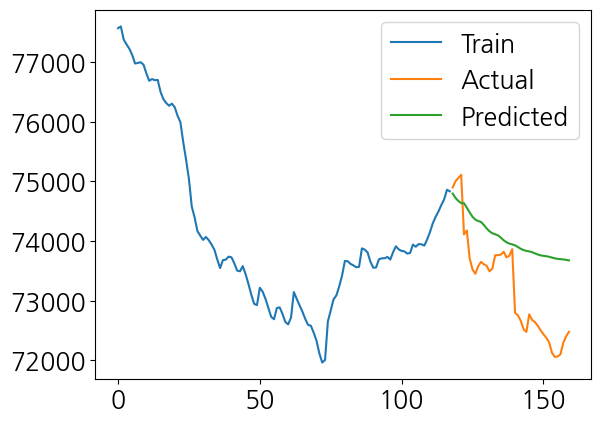

In [55]:
error = AR_people(data_gu.iloc[0, :], 12)

In [56]:
error

,MAE,RMSE
0,875.964847,996.661697


# AR 모델 (차분 o)

In [75]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

def AR_people(df, window_size):
    df.dropna(inplace=True)
    new_dataset = pd.DataFrame(list(df.items()), columns=['Date', 'diff_people'])
    new_dataset.index = new_dataset.Date
    new_dataset.drop("Date", axis=1, inplace=True)
    
    # 1회 차분
    differenced_data = new_dataset.diff().dropna()
    final_dataset = differenced_data.values.flatten()
    
    train_data = final_dataset[:118]
    valid_data = final_dataset[118:]
    
    model = AutoReg(train_data, lags=window_size)
    model_fit = model.fit()
    
    predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(valid_data) - 1, dynamic=False)
    
    # 역차분을 적용하여 원래 스케일로 복원
    last_train_value = new_dataset.values[117]  # 마지막 학습 데이터 값
    predictions = np.cumsum(np.r_[last_train_value, predictions])  # 차분값 누적 합산
    predictions = predictions[0:]  # 첫 번째 값 제거
    
    valid_data = new_dataset.values[118:].flatten()
    
    # Calculate MAE and RMSE
    print(len(valid_data))
    print(len(predictions))
    
    mae = mean_absolute_error(valid_data, predictions)
    rmse = np.sqrt(mean_squared_error(valid_data, predictions))
    
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    
    # Plot the results
    # plt.plot(new_dataset[:118], label='Train')
    # plt.plot(new_dataset[118:].index, valid_data, label='Actual')
    # plt.plot(new_dataset[118:].index, predictions, label='Predicted')
    # plt.legend()
    # plt.show()
    
    return pd.DataFrame({'MAE': [mae], 'RMSE': [rmse]})

# Example usage (assuming data_gu is defined and has the required structure):
result_df = AR_people(data_gu.iloc[0, :], 6)
print(result_df)


42
42
MAE: 1976.8981745823428
RMSE: 2171.2919562886536
           MAE         RMSE
0  1976.898175  2171.291956


In [79]:
import pandas as pd

# 각 행에 대해 AR_people 함수를 호출하고 결과를 저장할 리스트
results = []

# 0번 행부터 25번 행까지 반복
for i in range(25):
    print(i)
    result_df = AR_people(data_gu.iloc[i, :], 6)
    result_df['Row'] = i  # 결과에 행 번호를 추가
    results.append(result_df)

# 모든 결과를 하나의 데이터프레임으로 묶기
final_results = pd.concat(results).reset_index(drop=True)
print(final_results)


0
42
42
MAE: 1976.8981745823428
RMSE: 2171.2919562886536
1
42
42
MAE: 434.87186679531635
RMSE: 584.3774919575609
2
42
42
MAE: 6353.119741435224
RMSE: 7472.651026760522
3
42
42
MAE: 3019.8992468241495
RMSE: 3471.3419828928586
4
42
42
MAE: 640.6844409913534
RMSE: 698.8056631955068
5
42
42
MAE: 1033.1449812804487
RMSE: 1281.024696755004
6
42
42
MAE: 1961.5217950497656
RMSE: 2160.7082504720333
7
42
42
MAE: 1589.6863701431978
RMSE: 1785.5736455492508
8
42
42
MAE: 1753.701882764018
RMSE: 1957.0303291883083
9
42
42
MAE: 642.4037305407761
RMSE: 720.1842048477238
10
42
42
MAE: 1260.3914849334383
RMSE: 1511.5465714660509
11
42
42
MAE: 2595.8177996721633
RMSE: 3084.6292463960535
12
42
42
MAE: 730.5667317431854
RMSE: 954.4556884111187
13
42
42
MAE: 513.9952262556554
RMSE: 695.7787245694387
14
42
42
MAE: 371.2981775640212
RMSE: 487.80721728633625
15
42
42
MAE: 2726.467996825657
RMSE: 4010.721951234217
16
42
42
MAE: 788.9443547129839
RMSE: 943.1654170123317
17
42
42
MAE: 947.8743863909189
RMSE: 1088

In [80]:
print(final_results)

            MAE         RMSE  Row
0   1976.898175  2171.291956    0
1    434.871867   584.377492    1
2   6353.119741  7472.651027    2
3   3019.899247  3471.341983    3
4    640.684441   698.805663    4
5   1033.144981  1281.024697    5
6   1961.521795  2160.708250    6
7   1589.686370  1785.573646    7
8   1753.701883  1957.030329    8
9    642.403731   720.184205    9
10  1260.391485  1511.546571   10
11  2595.817800  3084.629246   11
12   730.566732   954.455688   12
13   513.995226   695.778725   13
14   371.298178   487.807217   14
15  2726.467997  4010.721951   15
16   788.944355   943.165417   16
17   947.874386  1088.748970   17
18  5790.202064  6519.007667   18
19  1351.986740  1630.350702   19
20  1710.630546  2024.115102   20
21  4064.967586  4506.869534   21
22  2177.251089  2652.406317   22
23  1481.874557  1642.503216   23
24  4920.323473  5105.255590   24
